In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats.mstats import pearsonr, spearmanr

In [2]:
subset = False
fol = '/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22_tiered_rankedidea/cellular_fraction/perctcorr/maxscore_relative/cytof'

files = os.listdir(fol)

if '.ipynb_checkpoints' in files:
    files.remove('.ipynb_checkpoints')

if '.DS_Store' in files:
    files.remove('.DS_Store')

In [3]:
dfs = []
for i, file in enumerate(files):
    data = pd.read_csv(fol + '/' + file, sep='\t', index_col=0)
    df = pd.DataFrame(data)
    dfs.append(df.copy())
    
for i, df in enumerate(dfs):
    cols = []
    for cell in list(df.columns):
        if '.x' in cell:
            cols.append(cell.split('.')[0])
        elif '.y' in cell:
            cols.append(cell.split('.')[0] + '_real')
        else:
            cols.append(cell)
    df.columns = cols

for i, df in enumerate(dfs): 
    if i == 0:
        samples = list(df.index)
        columns = list(df.columns)
    else:
        new_samples = list(df.index)
        new_columns = list(df.columns)
        samples = list(set(new_samples).intersection(samples))
        columns = list(set(new_columns + columns))
    columns = list(set(columns))


new_columns = []
for col in columns:
    if '_real' in col:
        new_columns.append(col.split('_')[0])
        
columns = new_columns
print(columns)

['PC', 'mB', 'ed8', 'Mono', 'em8', 'nB', 'cm8', 'cm4', 'NaiveCD4', 'NK', 'NaiveCD8', 'Tregs', 'em4']


In [4]:
#cytof
columns=['NaiveCD8', 'em4', 'cm8', 'mB', 'ed8', 'Mono', 'nB', 'Tregs', 'cm4', 'NK', 'NaiveCD4', 'em8']  #["CD4","CD8","Tr","mB","nB","m4","Mn","NK"] #,"DC","Eo","mNeu"]
#columns=['NaiveCD8', 'em4', 'cm8',  'ed8',  'nB', 'Tregs', 'cm4', 'NK', 'NaiveCD4', 'em8'] 
#flow
#columns=['em4',  'mB',  'Mono', 'nB', 'Tregs', 'cm4', 'NK', 'NaiveCD4']

In [5]:
def generate_df_dic(correlation, dfs, columns):
    df_corr = {}
    for i, df in enumerate(dfs):
        if subset:
            df = df.loc[samples, :]
        for cell in columns:
            if cell in df.columns:
                if cell not in df_corr:
                    df_corr[cell] = []
                corr = correlation(list(df[cell]), list(df[cell + '_real']))[0]
                df_corr[cell].append(corr)
            else:
                df_corr[cell].append(float('NaN'))
    return df_corr

In [6]:
df_pearson_dic = generate_df_dic(pearsonr, dfs, columns)
df_spearman_dic = generate_df_dic(spearmanr, dfs, columns)

In [7]:
df_pearson = pd.DataFrame.from_dict(df_pearson_dic, orient='index', columns = files)
df_spearman = pd.DataFrame.from_dict(df_spearman_dic, orient='index', columns = files)





#irfmethodnames=['ranked_v1_top100','ranked_v1_top500','ranked_v1_top1000','ranked_v2_top100','ranked_v2_top500','ranked_v2_top1000','ranked_v1meth.1_SM_top100','ranked_v1meth.1_SM_top500','ranked_v1meth.1_SM_top1000','ranked_v2meth.1_SM_top100','ranked_v2meth.1_SM_top500','ranked_v2meth.1_SM_top1000','ranked_v1meth.2_SM_top100','ranked_v1meth.2_SM_top500','ranked_v1meth.2_SM_top1000','ranked_v2meth.2_SM_top100','ranked_v2meth.2_SM_top500','ranked_v2meth.2_SM_top1000','ranked_v1meth.3_SM_top100','ranked_v1meth.3_SM_top500','ranked_v1meth.3_SM_top1000','ranked_v2meth.3_SM_top100','ranked_v2meth.3_SM_top500','ranked_v2meth.3_SM_top1000']
#irfmethodnames=['ranked_v1_top50','ranked_v1_top100','ranked_v1_top500','ranked_v1_top1000','ranked_v1_inflection','ranked_v2_top50','ranked_v2_top100','ranked_v2_top500','ranked_v2_top1000','ranked_v2_inflection']

irfmethodnames=df_pearson.columns
df_pearson=df_pearson[irfmethodnames]

display(df_pearson)



,Previous_method_TieredV1,Previous_method_RankedV1,Maxscore_based_RankedV1_normalized,Previous_method_RankedV2_normalized,Previous_method_TieredV1_normalized,Previous_methodRankedV2,Maxscore_basedRankedV2,Maxscore_based_TieredV1_normalized,Maxscore_based_RankedV1,Maxscore_based_TieredV1,Maxscore_based_RankedV2_normalized,Previous_method_RankedV1_normalized
NaiveCD8,0.298866,0.467043,0.476849,0.247431,0.298866,0.247431,0.596875,0.350236,0.615345,0.756879,0.285374,0.467043
em4,0.456722,0.244949,0.230125,0.494544,0.456722,0.494544,0.342059,0.453326,0.203649,0.397836,0.396672,0.244949
cm8,0.936645,0.708358,0.748046,0.872879,0.936645,0.872879,0.907307,0.923104,0.801081,0.910993,0.886465,0.708358
mB,0.744347,0.827891,0.809903,0.732359,0.744347,0.732359,0.606925,0.745869,0.718095,0.635186,0.725749,0.827891
ed8,0.325469,0.571396,0.541219,0.364500,0.325469,0.364500,0.501459,0.376553,0.532700,0.491662,0.421090,0.571396
Mono,0.491823,-0.049137,0.128532,0.370167,0.491823,0.370167,0.466656,0.481646,0.147611,0.516876,0.420513,-0.049137
nB,-0.060855,-0.177955,-0.140462,-0.098203,-0.060855,-0.098203,0.062002,-0.041801,0.006721,0.094529,-0.086705,-0.177955
Tregs,0.890515,0.528292,0.470785,0.777665,0.890515,0.777665,0.335118,0.802905,0.085834,0.529027,0.707501,0.528292
cm4,0.837460,0.879030,0.918674,0.834065,0.837460,0.834065,0.942467,0.869957,0.827332,0.943939,0.843798,0.879030
NK,0.960987,0.908770,0.912023,0.966795,0.960987,0.966795,0.968680,0.962695,0.945925,0.960350,0.968003,0.908770


In [8]:
df_pearson.rename(index={"NaiveCD8":"Naive CD8 T","NaiveCD4":"Naive CD4 T","CD4": "Naive CD4", "CD8": "Naive CD8","mB":"Memory B",'Mn':'Mono','CD14':'Mono','CD19':'B Cell','nB':'Naive B','PC':'Palsma','cm8':'CD8 central memory','em8':'CD8 effector memory','m8':'CD8 memory','ed8':'CD8 effector','cm4':'CD4 central memory','em4':'CD4 effector memory','m4':'CD4 memory','mNeu':'PMN','Eo':'Eosinophil','Tr':'Tregs','Mg':'Megakaryocyte'},inplace=True)
display(df_pearson)

,Previous_method_TieredV1,Previous_method_RankedV1,Maxscore_based_RankedV1_normalized,Previous_method_RankedV2_normalized,Previous_method_TieredV1_normalized,Previous_methodRankedV2,Maxscore_basedRankedV2,Maxscore_based_TieredV1_normalized,Maxscore_based_RankedV1,Maxscore_based_TieredV1,Maxscore_based_RankedV2_normalized,Previous_method_RankedV1_normalized
Naive CD8 T,0.298866,0.467043,0.476849,0.247431,0.298866,0.247431,0.596875,0.350236,0.615345,0.756879,0.285374,0.467043
CD4 effector memory,0.456722,0.244949,0.230125,0.494544,0.456722,0.494544,0.342059,0.453326,0.203649,0.397836,0.396672,0.244949
CD8 central memory,0.936645,0.708358,0.748046,0.872879,0.936645,0.872879,0.907307,0.923104,0.801081,0.910993,0.886465,0.708358
Memory B,0.744347,0.827891,0.809903,0.732359,0.744347,0.732359,0.606925,0.745869,0.718095,0.635186,0.725749,0.827891
CD8 effector,0.325469,0.571396,0.541219,0.364500,0.325469,0.364500,0.501459,0.376553,0.532700,0.491662,0.421090,0.571396
Mono,0.491823,-0.049137,0.128532,0.370167,0.491823,0.370167,0.466656,0.481646,0.147611,0.516876,0.420513,-0.049137
Naive B,-0.060855,-0.177955,-0.140462,-0.098203,-0.060855,-0.098203,0.062002,-0.041801,0.006721,0.094529,-0.086705,-0.177955
Tregs,0.890515,0.528292,0.470785,0.777665,0.890515,0.777665,0.335118,0.802905,0.085834,0.529027,0.707501,0.528292
CD4 central memory,0.837460,0.879030,0.918674,0.834065,0.837460,0.834065,0.942467,0.869957,0.827332,0.943939,0.843798,0.879030
NK,0.960987,0.908770,0.912023,0.966795,0.960987,0.966795,0.968680,0.962695,0.945925,0.960350,0.968003,0.908770


In [9]:
df_spearman.rename(index={"NaiveCD8":"Naive CD8 T","NaiveCD4":"Naive CD4 T","CD4": "Naive CD4", "CD8": "Naive CD8","mB":"Memory B",'Mn':'Mono','CD14':'Mono','CD19':'B Cell','nB':'Naive B','PC':'Palsma','cm8':'CD8 central memory','em8':'CD8 effector memory','m8':'CD8 memory','ed8':'CD8 effector','cm4':'CD4 central memory','em4':'CD4 effector memory','m4':'CD4 memory','mNeu':'PMN','Eo':'Eosinophil','Tr':'Tregs','Mg':'Megakaryocyte'},inplace=True)
df_spearman=df_spearman[irfmethodnames]


In [10]:
df_pearson.to_csv(fol + '_pearson_correlation.txt', sep='\t')
df_spearman.to_csv(fol + '_spearman_correlation.txt', sep='\t')

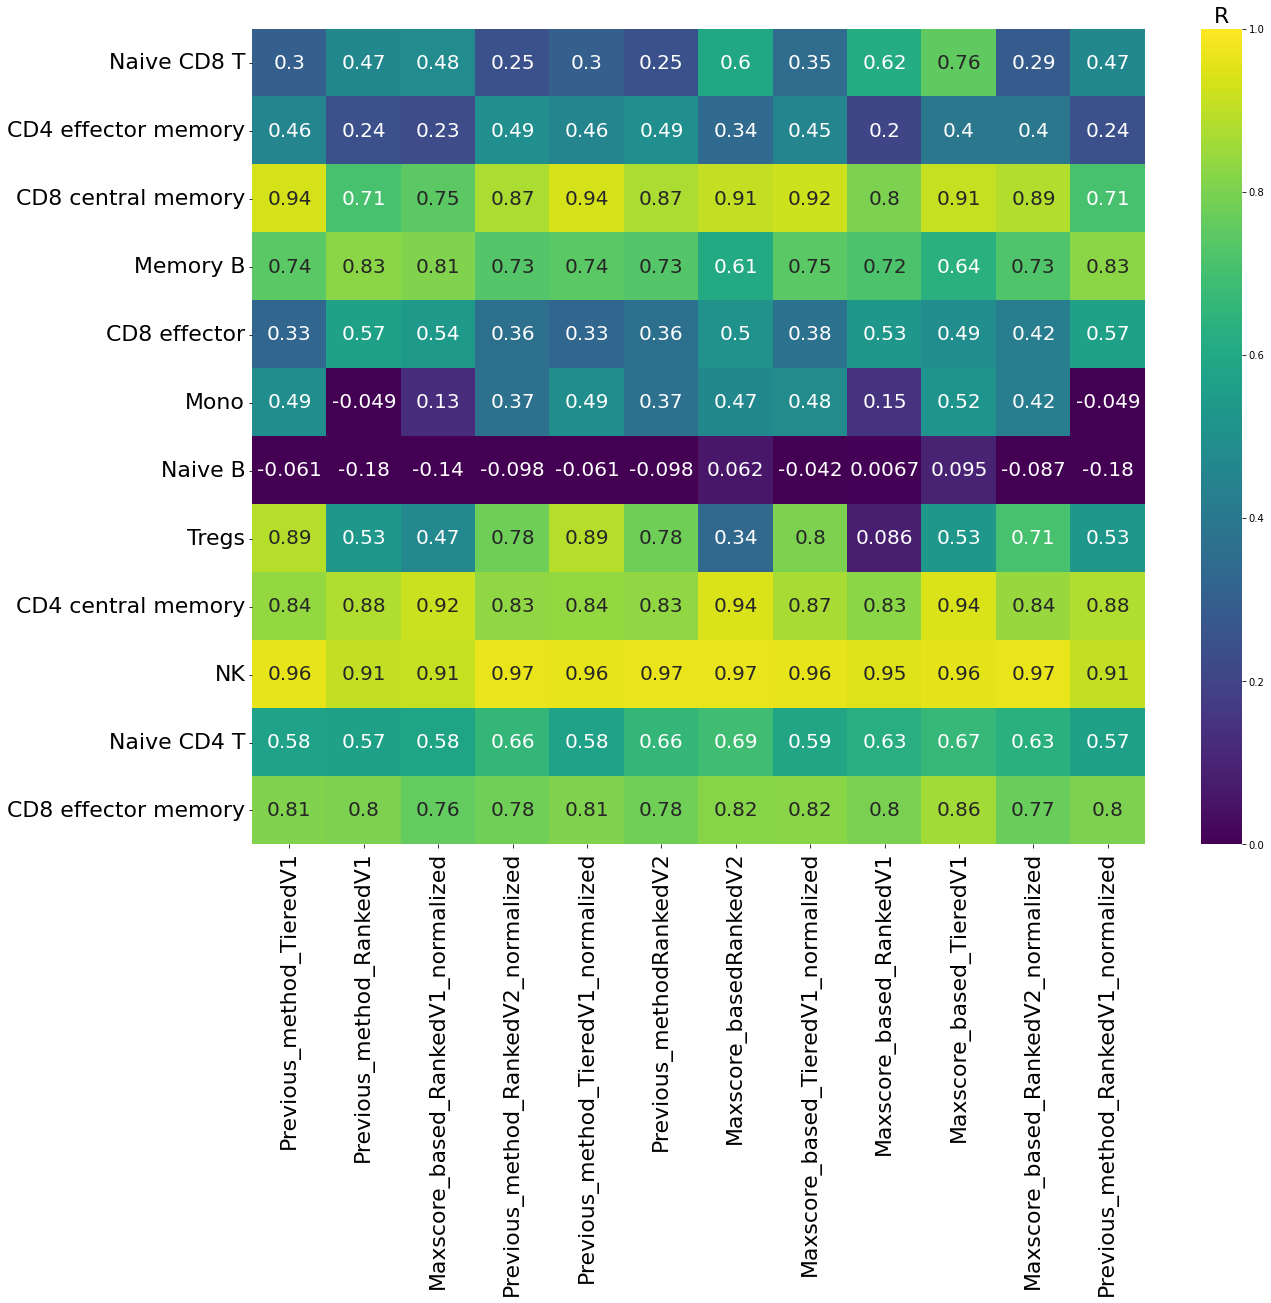

In [11]:
plt.figure(figsize=(20,15))
pearson_heatmap = sns.heatmap(df_pearson, cmap='viridis', annot=True,annot_kws={"size": 20}, vmin=0.0, vmax=1.0)
pearson_heatmap.set_xticklabels(pearson_heatmap.get_xmajorticklabels(), fontsize = 22,rotation=90)
pearson_heatmap.set_yticklabels(pearson_heatmap.get_ymajorticklabels(), fontsize = 22,rotation=0)
cbar = pearson_heatmap.collections[0].colorbar#.set_label('# of contacts', horizontalalignment='left')
cbar.ax.set_title('R',fontsize = 22)
pearson_heatmap.set_facecolor('gray')
plt.savefig(fol + '_pearson_heatmap.pdf', bbox_inches='tight')

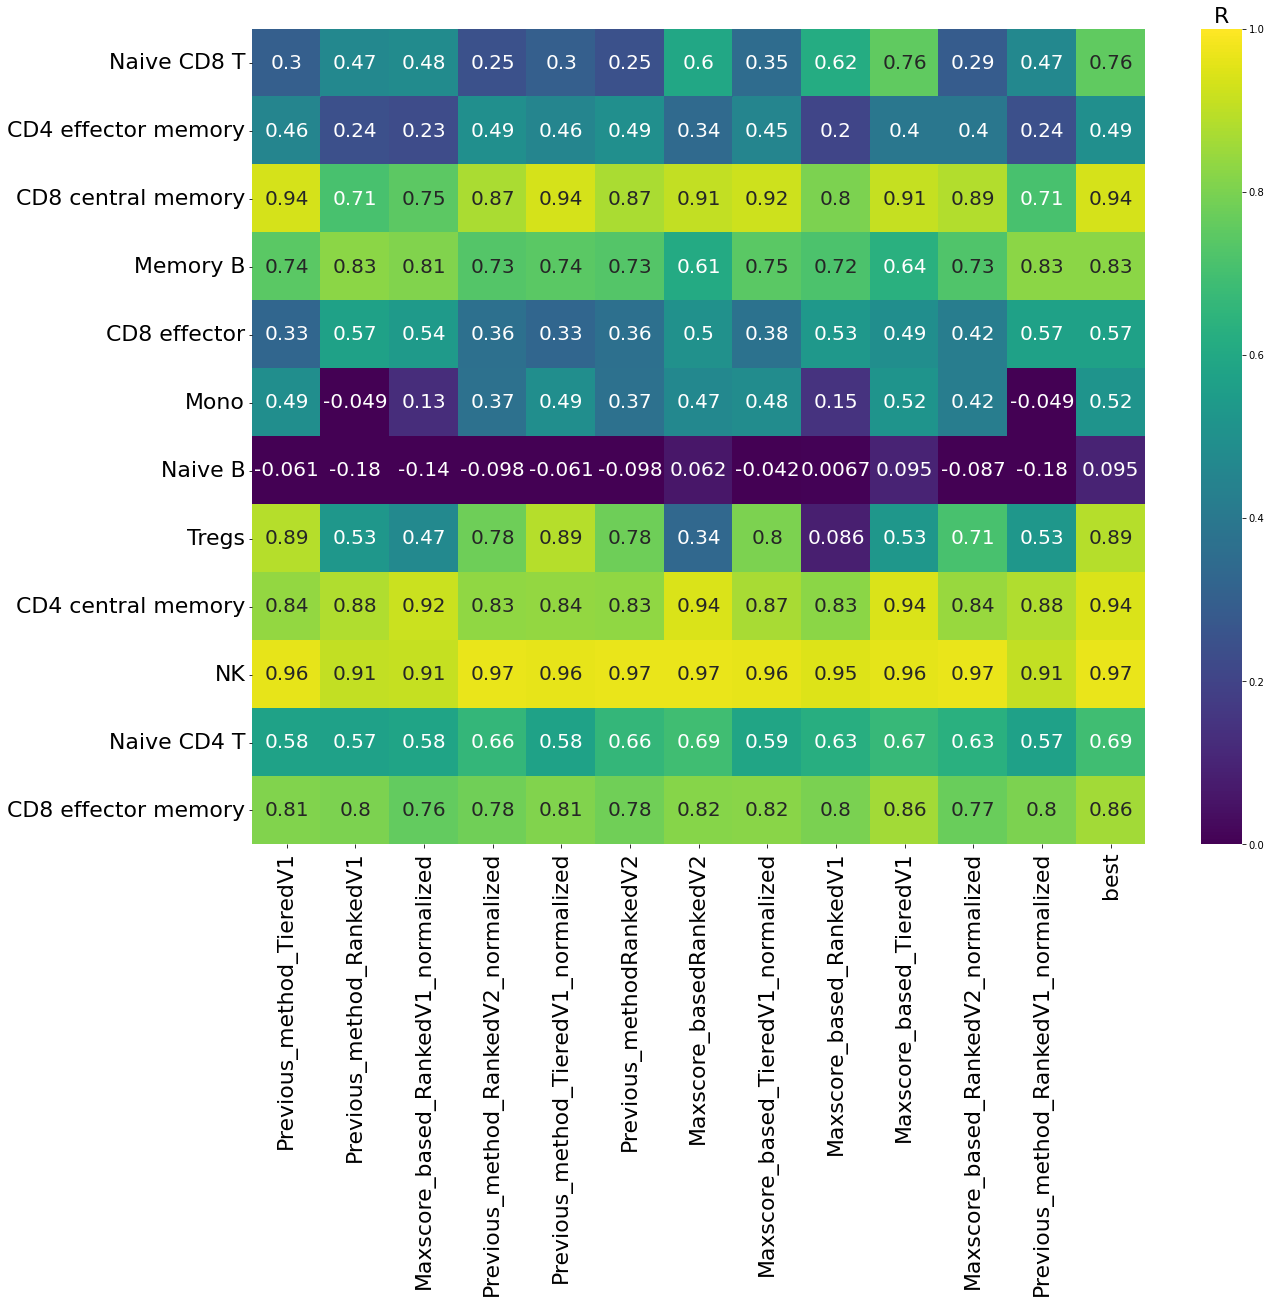

In [12]:
df_pearson_withbestcol=df_pearson.copy()
df_pearson_withbestcol['best']=df_pearson_withbestcol.max(axis=1)
df_pearson_withbestcol.to_csv(fol + '_pearson_correlation_withbest.txt', sep='\t')
plt.figure(figsize=(20,15))
pearson_heatmap = sns.heatmap(df_pearson_withbestcol, cmap='viridis', annot=True,annot_kws={"size": 20}, vmin=0.0, vmax=1.0)
pearson_heatmap.set_xticklabels(pearson_heatmap.get_xmajorticklabels(), fontsize = 22,rotation=90)
pearson_heatmap.set_yticklabels(pearson_heatmap.get_ymajorticklabels(), fontsize = 22,rotation=0)
cbar = pearson_heatmap.collections[0].colorbar#.set_label('# of contacts', horizontalalignment='left')
cbar.ax.set_title('R',fontsize = 22)
pearson_heatmap.set_facecolor('gray')
plt.savefig(fol + '_pearson_heatmap_withbestcol.pdf', bbox_inches='tight')

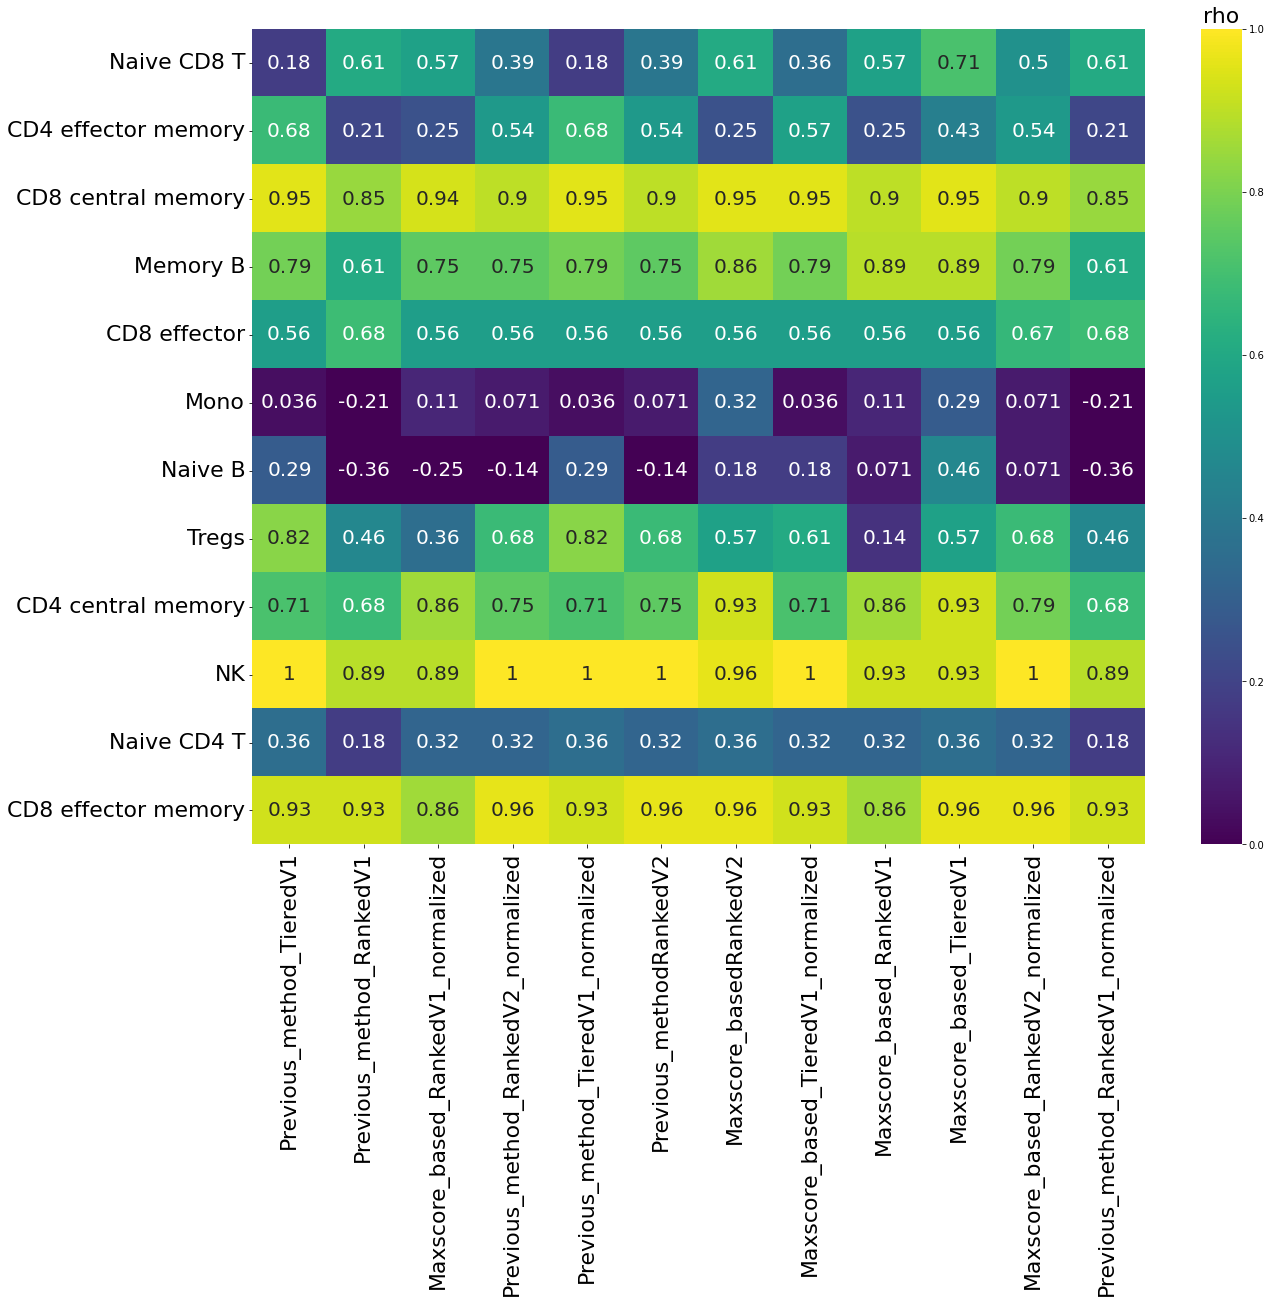

In [13]:
plt.figure(figsize=(20,15))
spearman_heatmap = sns.heatmap(df_spearman, cmap='viridis', annot=True,annot_kws={"size": 20}, vmin=0.0, vmax=1.0)
spearman_heatmap.set_xticklabels(spearman_heatmap.get_xmajorticklabels(), fontsize = 22,rotation=90)
spearman_heatmap.set_yticklabels(spearman_heatmap.get_ymajorticklabels(), fontsize = 22,rotation=0)
cbar = spearman_heatmap.collections[0].colorbar#.set_label('# of contacts', horizontalalignment='left')
cbar.ax.set_title('rho',fontsize = 22)
spearman_heatmap.set_facecolor('gray')
plt.savefig(fol + '_spearman_heatmap.pdf', bbox_inches='tight')

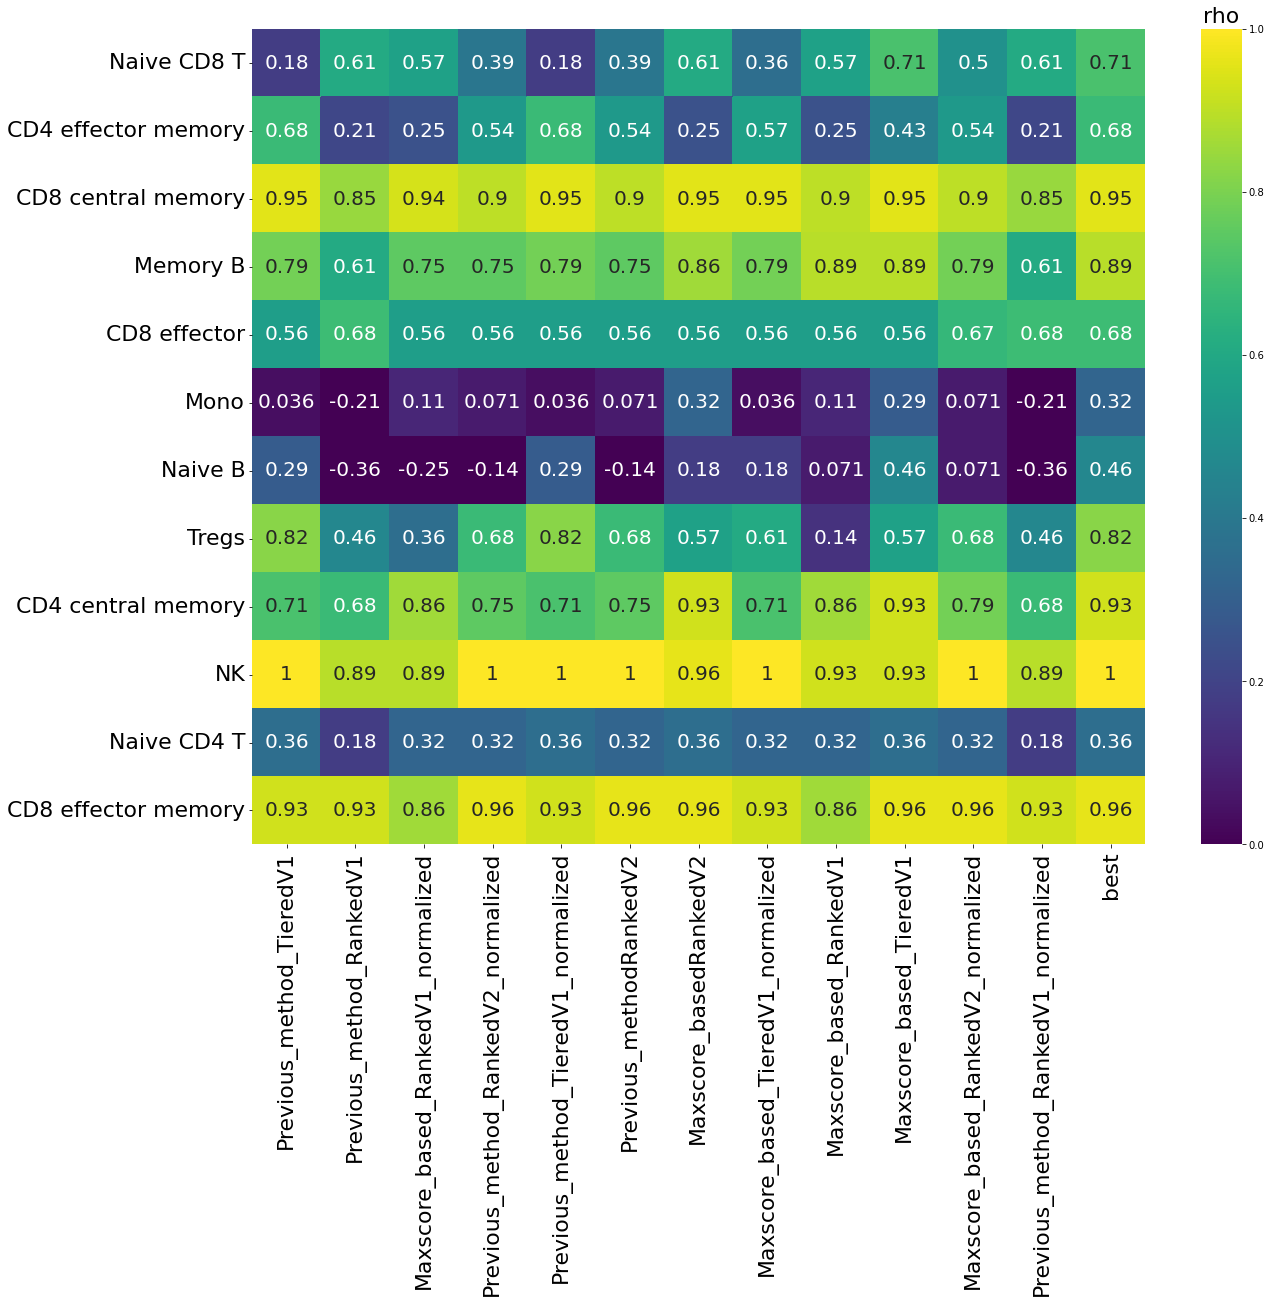

In [14]:
df_spearman_withbestcol=df_spearman.copy()
df_spearman_withbestcol['best']=df_spearman_withbestcol.max(axis=1)
df_spearman_withbestcol.to_csv(fol + '_spearman_correlation_withbest.txt', sep='\t')
plt.figure(figsize=(20,15))
spearman_heatmap = sns.heatmap(df_spearman_withbestcol, cmap='viridis', annot=True,annot_kws={"size": 20}, vmin=0.0, vmax=1.0)
spearman_heatmap.set_xticklabels(spearman_heatmap.get_xmajorticklabels(), fontsize = 22,rotation=90)
spearman_heatmap.set_yticklabels(spearman_heatmap.get_ymajorticklabels(), fontsize = 22,rotation=0)
cbar = spearman_heatmap.collections[0].colorbar#.set_label('# of contacts', horizontalalignment='left')
cbar.ax.set_title('rho',fontsize = 22)
spearman_heatmap.set_facecolor('gray')
plt.savefig(fol + '_spearman_heatmap_withbestcol.pdf', bbox_inches='tight')

In [15]:
df_pearson_mean=df_pearson.mean()
df_pearson_mean=df_pearson_mean.to_frame(name='Mean')
df_pearson_mean=df_pearson_mean.transpose()
df_pearson_mean

,Previous_method_TieredV1,Previous_method_RankedV1,Maxscore_based_RankedV1_normalized,Previous_method_RankedV2_normalized,Previous_method_TieredV1_normalized,Previous_methodRankedV2,Maxscore_basedRankedV2,Maxscore_based_TieredV1_normalized,Maxscore_based_RankedV1,Maxscore_based_TieredV1,Maxscore_based_RankedV2_normalized,Previous_method_RankedV1_normalized
Mean,0.605548,0.523343,0.536541,0.583887,0.605548,0.583887,0.60354,0.61109,0.525687,0.647369,0.581,0.523343


In [16]:
df_pearson_median=df_pearson.median()
df_pearson_median=df_pearson_median.to_frame(name='Median')
df_pearson_median=df_pearson_median.transpose()
df_pearson_median

,Previous_method_TieredV1,Previous_method_RankedV1,Maxscore_based_RankedV1_normalized,Previous_method_RankedV2_normalized,Previous_method_TieredV1_normalized,Previous_methodRankedV2,Maxscore_basedRankedV2,Maxscore_based_TieredV1_normalized,Maxscore_based_RankedV1,Maxscore_based_TieredV1,Maxscore_based_RankedV2_normalized,Previous_method_RankedV1_normalized
Median,0.659861,0.569367,0.561697,0.697598,0.659861,0.697598,0.6019,0.66648,0.621141,0.65241,0.670568,0.569367


In [17]:
dfsummary=pd.concat([df_pearson_mean,df_pearson_median])
dfsummary=dfsummary[irfmethodnames]

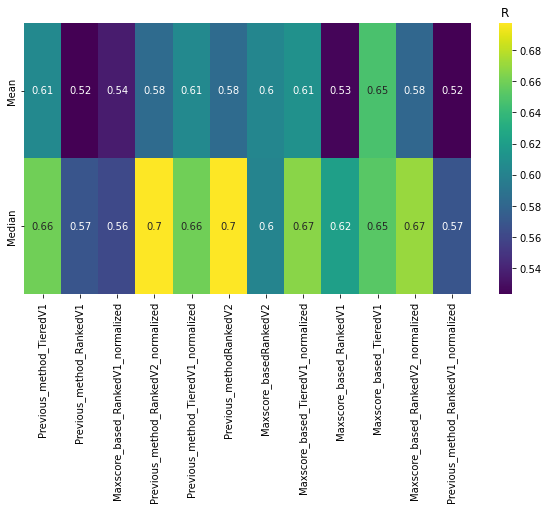

In [18]:
plt.figure(figsize=(10,5))
pearson_heatmap = sns.heatmap(dfsummary, cmap='viridis', annot=True)
cbar = pearson_heatmap.collections[0].colorbar#.set_label('# of contacts', horizontalalignment='left')
cbar.ax.set_title('R')
pearson_heatmap.set_facecolor('gray')
plt.savefig(fol + '_pearson_heatmap_summary.pdf', bbox_inches='tight')

In [19]:
df_spearman_mean=df_spearman.mean()
df_spearman_mean=df_spearman_mean.to_frame(name='Mean')
df_spearman_mean=df_spearman_mean.transpose()
df_spearman_mean

,Previous_method_TieredV1,Previous_method_RankedV1,Maxscore_based_RankedV1_normalized,Previous_method_RankedV2_normalized,Previous_method_TieredV1_normalized,Previous_methodRankedV2,Maxscore_basedRankedV2,Maxscore_based_TieredV1_normalized,Maxscore_based_RankedV1,Maxscore_based_TieredV1,Maxscore_based_RankedV2_normalized,Previous_method_RankedV1_normalized
Mean,0.608274,0.460966,0.517487,0.565079,0.608274,0.565079,0.626131,0.584465,0.538293,0.670774,0.606826,0.460966


In [20]:
df_spearman_median=df_spearman.median()
df_spearman_median=df_spearman_median.to_frame(name='Median')
df_spearman_median=df_spearman_median.transpose()
df_spearman_median

,Previous_method_TieredV1,Previous_method_RankedV1,Maxscore_based_RankedV1_normalized,Previous_method_RankedV2_normalized,Previous_method_TieredV1_normalized,Previous_methodRankedV2,Maxscore_basedRankedV2,Maxscore_based_TieredV1_normalized,Maxscore_based_RankedV1,Maxscore_based_TieredV1,Maxscore_based_RankedV2_normalized,Previous_method_RankedV1_normalized
Median,0.696429,0.607143,0.565005,0.618576,0.696429,0.618576,0.589286,0.589286,0.565005,0.642857,0.672633,0.607143


In [21]:
dfsummary=pd.concat([df_spearman_mean,df_spearman_median])
dfsummary=dfsummary[irfmethodnames]
dfsummary

,Previous_method_TieredV1,Previous_method_RankedV1,Maxscore_based_RankedV1_normalized,Previous_method_RankedV2_normalized,Previous_method_TieredV1_normalized,Previous_methodRankedV2,Maxscore_basedRankedV2,Maxscore_based_TieredV1_normalized,Maxscore_based_RankedV1,Maxscore_based_TieredV1,Maxscore_based_RankedV2_normalized,Previous_method_RankedV1_normalized
Mean,0.608274,0.460966,0.517487,0.565079,0.608274,0.565079,0.626131,0.584465,0.538293,0.670774,0.606826,0.460966
Median,0.696429,0.607143,0.565005,0.618576,0.696429,0.618576,0.589286,0.589286,0.565005,0.642857,0.672633,0.607143


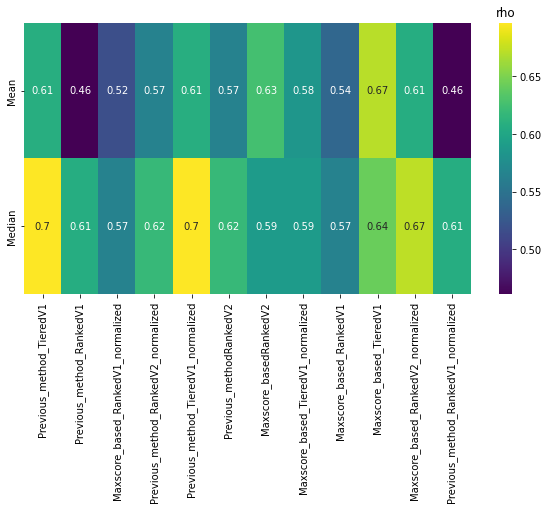

In [22]:
plt.figure(figsize=(10,5))
spearman_heatmap = sns.heatmap(dfsummary, cmap='viridis', annot=True)
cbar = spearman_heatmap.collections[0].colorbar#.set_label('# of contacts', horizontalalignment='left')
cbar.ax.set_title('rho')
pearson_heatmap.set_facecolor('gray')
plt.savefig(fol + '_spearman_heatmap_summary.pdf', bbox_inches='tight')